# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Correlation Coefficient: -0.39.


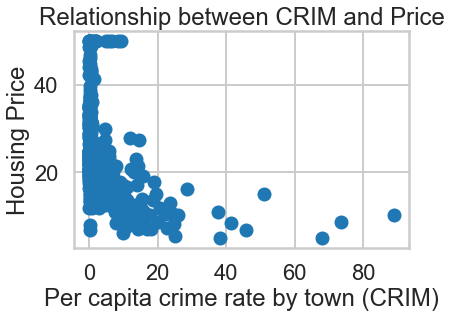

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
print('Correlation Coefficient: %.2f.' % np.corrcoef(bos.CRIM, bos.PRICE)[0,1])

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

</div>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>
It looks like there is a negative non-linear relationship between the per capita crime rate and housing price. It is strange that there are observed housing prices at around 50 when the per captita rates are approximately 5-10 since there is a significant difference between the bulk of the housing prices in this range.  These value appear to be outliers. 

<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>


Correlation Coefficient: 0.70.


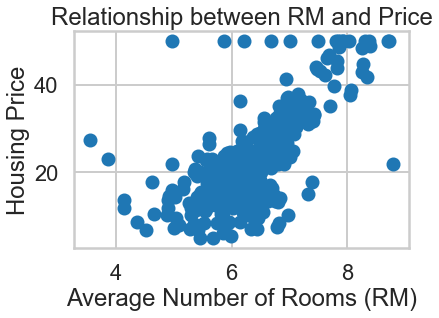

In [13]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

print('Correlation Coefficient: %.2f.' % np.corrcoef(bos.RM, bos.PRICE)[0,1])

There is a positive linear relationship between the average number of rooms and housing price.  This makes sense as houses with more rooms tend to be larger, thus making them pricier. There are some outliers in this graph; a couple of towns with an average of less than 4 rooms that have higher than expected prices.  Another town with an average of 5 rooms has a very high price.  These towns could be closer to the Boston city center where housing is smaller but pricier.  A town with an average of about 9 rooms has a much lower than expected price.  This may be a remote town far from the Boston city center. 

Correlation Coefficient: -0.51.


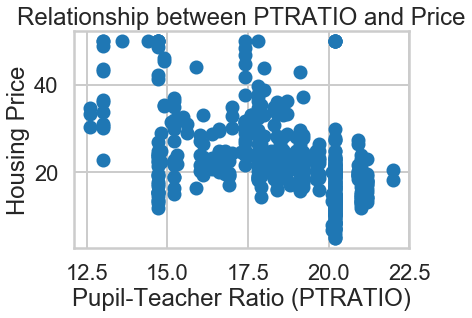

In [14]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
print('Correlation Coefficient: %.2f.' % np.corrcoef(bos.PTRATIO, bos.PRICE)[0,1])

There is a negative linear relationship between the pupil-teacher ratio and housing price.  This makes sense since low pupil-teacher ratios generally mean the school is better and with better schools come higher housing prices.  One interesting thing is how for one town with a pupil-teacher ratio of around 20, the housing price is much higher than expected. Perhaps there are fewer but higher capacity schools in that town.  Based on the appearances of the graphs and the correlation coefficients, the average number of rooms has a stronger relationship with housing price than the pupil-teacher ratio. 

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>


Correlation Coefficient: 0.36.


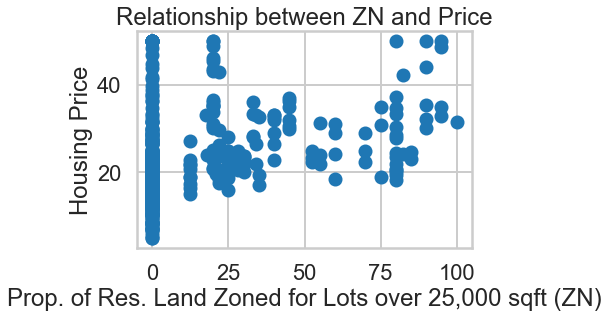

In [15]:
# Creating scatter plot between ZN and PRICE
plt.scatter(bos.ZN, bos.PRICE)
plt.xlabel("Prop. of Res. Land Zoned for Lots over 25,000 sqft (ZN)")
plt.ylabel("Housing Price")
plt.title("Relationship between ZN and Price")
print('Correlation Coefficient: %.2f.' % np.corrcoef(bos.ZN, bos.PRICE)[0,1])

I would have thought that there would have been a more significant relationship between the proportion of residential land zoned for lots over 25,000sqft and the housing price since there may be larger, pricier houses when the proportion is higher. However, there is a weak, positive linear relationship between these two variables. This could be due to there being so many towns without these large lots.  The spread in housing price for higher proportions could be due to there being more land available for large, cheaper properties in more remote towns.  

Correlation Coefficient: -0.48.


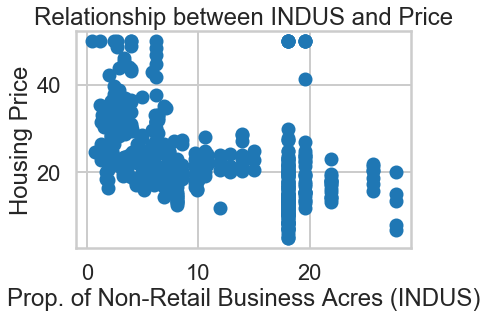

In [16]:
# Creating scatter plot between INDUS and PRICE
plt.scatter(bos.INDUS, bos.PRICE)
plt.xlabel("Prop. of Non-Retail Business Acres (INDUS)")
plt.ylabel("Housing Price")
plt.title("Relationship between INDUS and Price")
print('Correlation Coefficient: %.2f.' % np.corrcoef(bos.INDUS, bos.PRICE)[0,1])

What comes to mind when thinking above non-retail businesses is factories.  Living in an area with factories is not desirable so it makes sense that there is a negative non-linear relationship between the proportion of non-retail business acres and housing price.  In addition, there may not be enough land for houses so perhaps the houses have to be smaller in areas where the proportion is higher.  There are a few outliers where the proportion is just below 20; maybe there are businesses such as tv stations and phone/internet companies in the areas. 

Correlation Coefficient: -0.43.


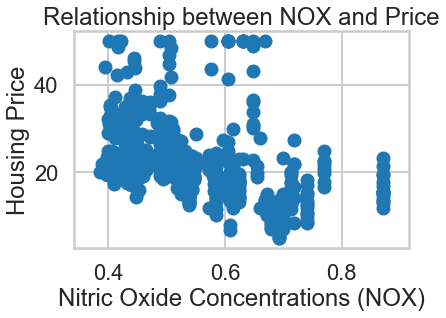

In [17]:
# Creating scatter plot between NOX and PRICE
plt.scatter(bos.NOX, bos.PRICE)
plt.xlabel("Nitric Oxide Concentrations (NOX)")
plt.ylabel("Housing Price")
plt.title("Relationship between NOX and Price")
print('Correlation Coefficient: %.2f.' % np.corrcoef(bos.NOX, bos.PRICE)[0,1])

Correlation Coefficient: 0.76.


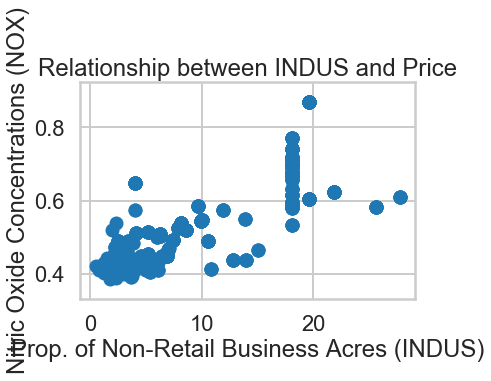

In [18]:
# Creating scatter plot between INDUS and NOX
plt.scatter(bos.INDUS, bos.NOX)
plt.xlabel('Prop. of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.title('Relationship between INDUS and Price')
print('Correlation Coefficient: %.2f.' % np.corrcoef(bos.INDUS, bos.NOX)[0,1])

For areas with higher concentrations of nitric oxide, there is likely more pollution which can make the area less desirable.  So a negative linear relationship between the nitric oxide concentrations and housing price makes sense.  There are some towns with higher housing prices when the nitric oxide concentrations are around 0.6-0.7.  These could be towns where there is a significant amount of car traffic which could lead to higher concentrations of nitric oxide.  Looking at the graph for proportion of non-retail business acres and nitric oxide concentrations, there is a somewhat significant positive linear relationship.  So areas with, for example, more factories, there would be higher concentrations of nitric oxide.

Correlation Coefficient: -0.38


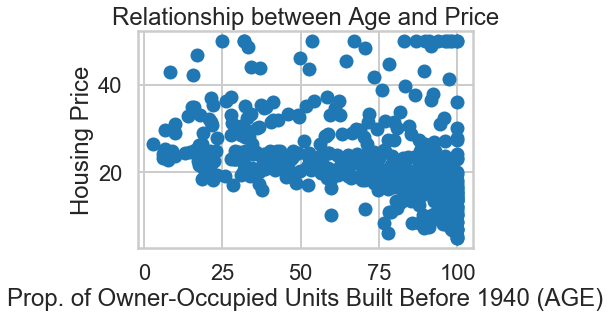

In [19]:
# Creating scatter plot between AGE and PRICE
plt.scatter(bos.AGE, bos.PRICE)
plt.xlabel("Prop. of Owner-Occupied Units Built Before 1940 (AGE)")
plt.ylabel("Housing Price")
plt.title("Relationship between Age and Price")
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.AGE, bos.PRICE)[0,1])

It is interesting that there isn't a stronger negative linear relationship between the proportion of owner-occupied units build before 1940 and housing price.  It could be that people in better off areas just renovate old houses instead of demolishing them.  

Correlation Coefficient: 0.25


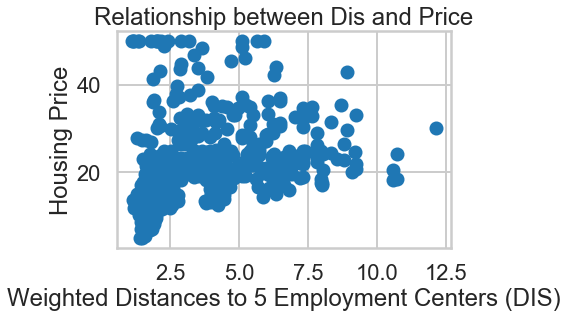

In [20]:
# Creating scatter plot between DIS and PRICE
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("Weighted Distances to 5 Employment Centers (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between Dis and Price")
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.DIS, bos.PRICE)[0,1])

There is a weak positive linear relationship between the weighted distances to 5 employment centers and housing price.  There likely would more employment centers near the city center of Boston and also in poorer areas where more people are seeking jobs.  

Correlation Coefficient: -0.47


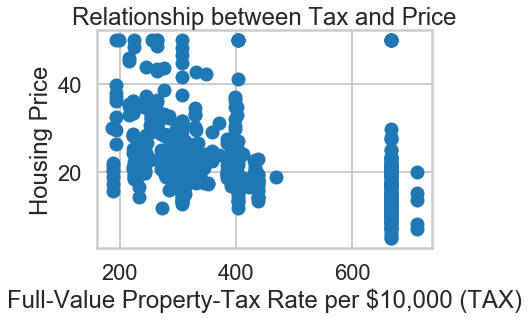

In [21]:
# Creating scatter plot between TAX and PRICE
plt.scatter(bos.TAX, bos.PRICE)
plt.xlabel("Full-Value Property-Tax Rate per $10,000 (TAX)")
plt.ylabel("Housing Price")
plt.title("Relationship between Tax and Price")
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.TAX, bos.PRICE)[0,1])

There is a negative linear relationship between the full-value property-tax rate and housing price.  There are many towns with moderate to low housing prices with high tax rates.  Perhaps in these towns there are fewer businesses so that property tax is higher.  

Text(0,0.5,'1000*(Prop. Blacks - 0.63)^2 (B)')

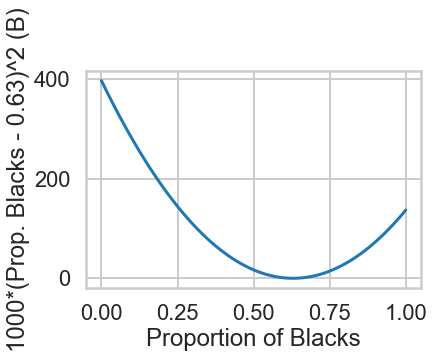

In [22]:
# Seeing how the proportion of blacks relates to the calculated value (B)
x = np.linspace(0, 1, 100)
y = 1000*(x - 0.63)**2
plt.plot(x, y)
plt.xlabel('Proportion of Blacks')
plt.ylabel('1000*(Prop. Blacks - 0.63)^2 (B)')

The above plot shows that there is a non-linear relationship between the proportion of blacks and the calculation for B. The y value is its highest when the proportion of blacks is 0 and at its lowest when the proportion is around 0.6.  It then increases to about 150 when the proportion is 1. 

Correlation Coefficient: 0.33


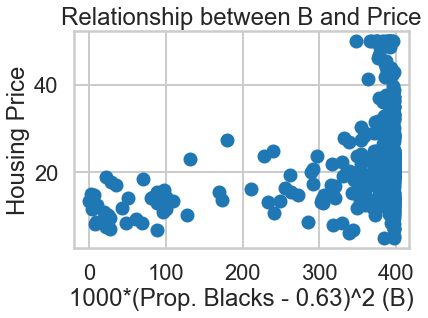

In [23]:
# Creating scatter plot between B and PRICE
plt.scatter(bos.B, bos.PRICE)
plt.xlabel("1000*(Prop. Blacks - 0.63)^2 (B)")
plt.ylabel("Housing Price")
plt.title("Relationship between B and Price")
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.B, bos.PRICE)[0,1])

There is a weak positive relationship between the calculation for B and housing price. When B is near 400 (low proportion of blacks), the housing price varies significantly.  

Correlation Coefficient: -0.74


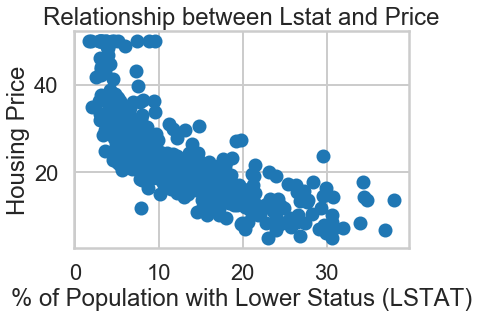

In [24]:
# Creating scatter plot between LSTAT and PRICE
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("% of Population with Lower Status (LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between Lstat and Price")
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.LSTAT, bos.PRICE)[0,1])

There is a significant negative non-linear relationship between the percent of population with lower status and housing price.  This makes sense since people with lower status wouldn't be able to afford pricier houses. 

Correlation Coefficient: -0.38


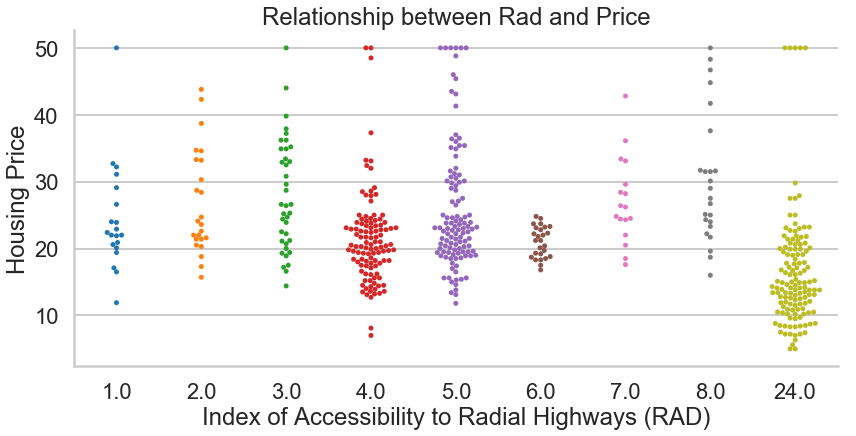

In [25]:
# Creating swarm plot between RAD and PRICE
sns.catplot(x='RAD', y='PRICE', kind='swarm', data=bos, height=6, aspect=2)
plt.xlabel("Index of Accessibility to Radial Highways (RAD)")
plt.ylabel("Housing Price")
plt.title("Relationship between Rad and Price")
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.RAD, bos.PRICE)[0,1])

There is a weak negative relationship between the index of accessibility to radial highways and housing price.  The housing price is low to moderate for towns with best access to the radial highways, perhaps becauase of traffic noise.  The spread of housing prices then gradually increases until index 5.  The spread is then at a minimum at index 6 and then increases with index 7/8.  Low to moderate housing prices dominate for index 24; these could be towns more on the outskirts of Boston.    

Correlation Coefficient: 0.18


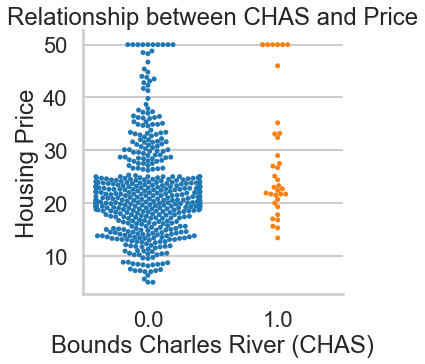

In [26]:
# Creating swarm plot between CHAS and PRICE
sns.catplot(x='CHAS', y='PRICE', kind='swarm', data=bos)
plt.xlabel('Bounds Charles River (CHAS)')
plt.ylabel('Housing Price')
plt.title('Relationship between CHAS and Price')
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.CHAS, bos.PRICE)[0,1])

There is not much of a relationship between if an area bounds the Charles River and housing price.  

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

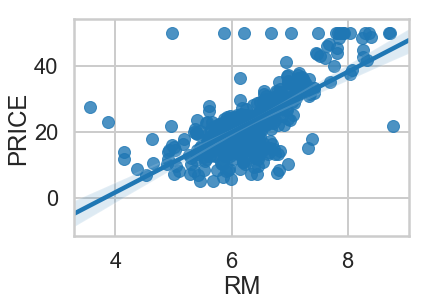

In [27]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


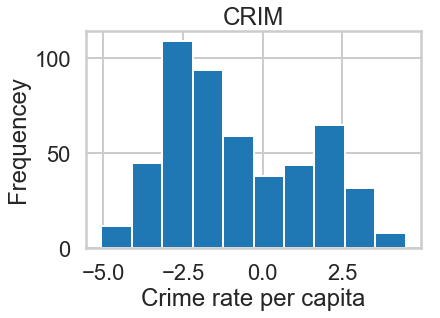

In [28]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?


</div>

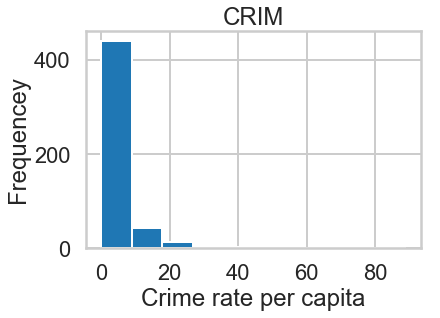

In [29]:
# Creating histogram of CRIM
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

Plotting a histogram of just the crime rate does not give us much information as the bulk of the values are between crime rates of 0-10.  Taking the log of the crime rate lets us better see the distribution of the crime rates.  The distribution of the log of crime rates appears to be right skewed.  

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>

Correlation Coefficient: -0.36


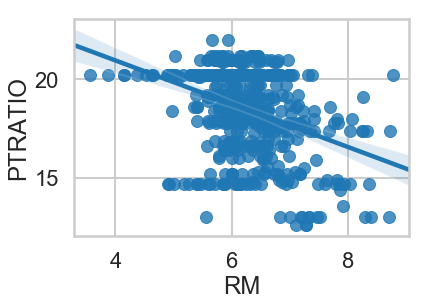

In [30]:
# Creating plot of RM vs PTRATIO
sns.regplot(y="PTRATIO", x="RM", data=bos, fit_reg = True)
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.PTRATIO, bos.RM)[0,1])

There is a slight negative relationship between the pupil-teacher ratio and the average number of rooms.  

Correlation Coefficient: 0.60


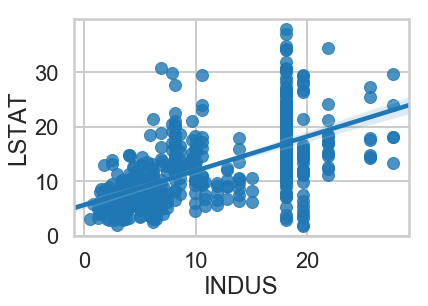

In [31]:
# Creating plot of INDUS vs LSTAT
sns.regplot(y='LSTAT', x='INDUS', data=bos, fit_reg=True)
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.LSTAT, bos.INDUS)[0,1])

There is a positive linear relationship between the proportion of non-retail business acres and the percent of population that is lower status. 

Correlation Coefficient: -0.39


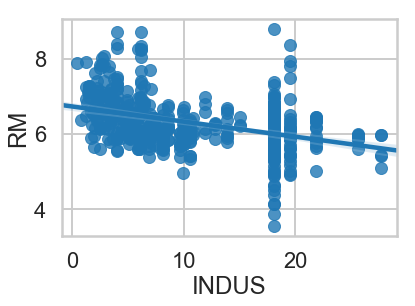

In [32]:
# Creating plot of INDUS vs RM
sns.regplot(y='RM', x='INDUS', data=bos, fit_reg=True)
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.RM, bos.INDUS)[0,1])

There is a negative linear relationship between the proportion of non-retail business acres and the average number of rooms. 

Correlation Coefficient: -0.61


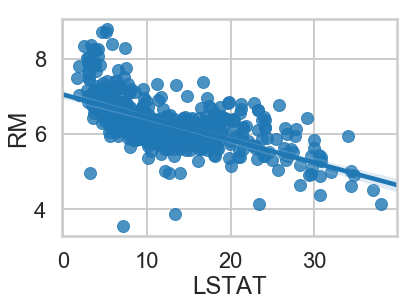

In [33]:
# Creating plot of LSTAT vs RM
sns.regplot(y='RM', x='LSTAT', data=bos, fit_reg=True)
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.RM, bos.LSTAT)[0,1])

There is a negative linear relationship between the percent of population that is lower status and the average number of rooms. 

Correlation Coefficient: 0.38


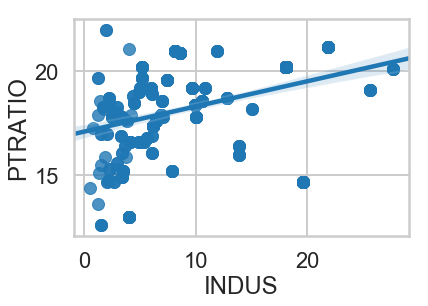

In [34]:
# Creating plot of INDUS vs PTRATIO
sns.regplot(y='PTRATIO', x='INDUS', data=bos, fit_reg=True)
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.PTRATIO, bos.INDUS)[0,1])

There is a weak positive relationship between the proportion of non-retail business acres and pupil-teacher ratio. 

Correlation Coefficient: 0.37


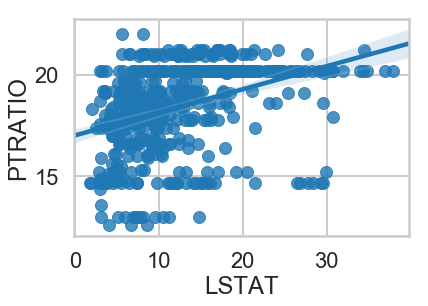

In [35]:
# Creating plot of LSTAT vs PTRATIO
sns.regplot(y='PTRATIO', x='LSTAT', data=bos, fit_reg=True)
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.PTRATIO, bos.LSTAT)[0,1])

There is a weak positive relationship between the percent of population that is lower status and the pupil-teacher ratio.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [36]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [37]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           2.49e-74
Time:                        22:23:24   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Correlation Coefficient: 0.70


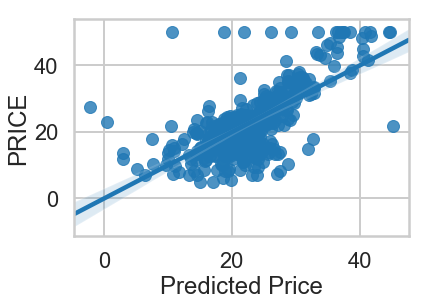

In [38]:
# Creating plot of predicted price vs observed price
sns.regplot(y='PRICE', x=m.fittedvalues, data=bos)
plt.xlabel('Predicted Price')
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.PRICE, m.fittedvalues)[0,1])

There is a somewhat strong positive linear relationship between the predicted housing price and observed housing price.  The model actually predicted a negative price, when infact the real price is close to 30. The model also predicted a price very close to 0 when the real price is closer to 20. The model seems to do generally well on the moderate housing prices.  It, however, seems to under predict when housing price is high. 

### Fitting Linear Regression using `sklearn`


In [39]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [40]:
# Look inside lm object
# lm.<tab>
lm.copy_X

True

In [41]:
lm.fit

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [42]:
lm.fit_intercept

True

In [43]:
lm.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [44]:
lm.n_jobs

1

In [45]:
lm.normalize

False

In [46]:
lm.predict

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [47]:
lm.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [48]:
lm.set_params

<bound method BaseEstimator.set_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [49]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
lm.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [51]:
lm.intercept_

36.49110328036089

In [52]:
lm.score(X, bos.PRICE)

0.7406077428649428

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

In [53]:
# Fitting with linear regression
lm = LinearRegression()
lm.fit(X, bos.PRICE)

lm2=LinearRegression(fit_intercept=False)
lm2.fit(X, bos.PRICE)

print('R2 Score with Intercept: %.2f: ' % lm.score(X, bos.PRICE))
print('R2 Score without Intercept: %.2f: ' % lm2.score(X, bos.PRICE))

R2 Score with Intercept: 0.74: 
R2 Score without Intercept: 0.71: 


You would set the fit_intercept parameter to 'False' to make the model not fit an intercept term.  For this case, I wouldn't recommend not having an intercept because when certain features have a value of 0, it is still possible for there to be a housing price above 0. For example, there are many towns the have a proportion of residential land zoned for lots over 25,000 sqft of 0 and there is a large spread of housing prices.  In addition, when I removed the intercept, the R2 score decreased from 0.74 to 0.71. 


<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

If the residuals of the features are all normally distributed, it is still possible for some of the features to be dependent on eachother. If two features are dependent and one of them has residuals that are normally distributed, the other feature would likely have residuals that are normally distributed becasue they are related.  

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>

It is not necessary for Y to be normally distributed because the features are not required to be normally distributed.  What matters is there is a linear relationship between the features and Y, the features are independent, and the residuals of the features are normally distributed. 

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [54]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.49110328036089


In [55]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [56]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [57]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>
</div>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>


Text(0,0.5,'Frequencey')

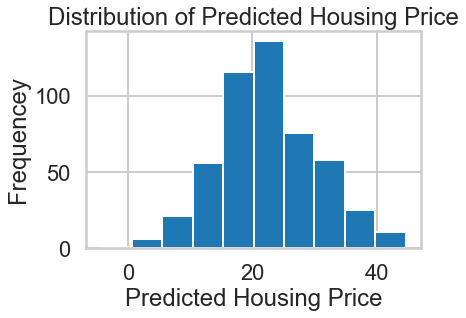

In [58]:
# Creating histogram of predicted prices
plt.hist(lm.predict(X))
plt.title('Distribution of Predicted Housing Price')
plt.xlabel('Predicted Housing Price')
plt.ylabel('Frequencey')

The distribution of the predicted housing price is normally distributed with a with a center near 20. The spread of the distribution is from less than 0 to around 45.  There looks to be a predicted housing price that is negative.  Negative housing prices should be changed to 0. 

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

Correlation Coefficient: 0.86


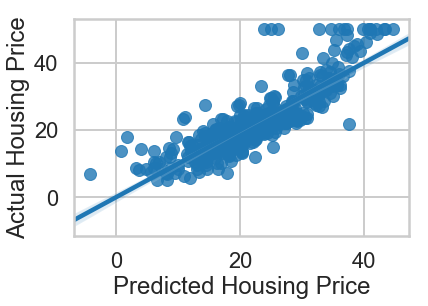

In [59]:
# Creating plot of predicted prices vs actual prices
sns.regplot(y='PRICE', x=lm.predict(X), data=bos)
plt.xlabel('Predicted Housing Price')
plt.ylabel('Actual Housing Price')
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.PRICE, lm.predict(X))[0,1])

This model performs generally well in predicting the housing price.  One issue is that the model predicted a negative price when infact it was around 7. The model also underpredicts higher housing prices (>40).  

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>

statsmodels:   
+ gives different options for least-squares (OLS, PLS, WLS)
+ can get a lot of information from the regression summary such as intercepts, R2 score, p-value...
- can't have the model not fit an intercept
- model appears not to be as accurate   
   
scikit-learn: 
+ can have the model not fit an intercept
+ seems to be more accurate
- don't get a summary table, have to grab information individually

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [60]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149873


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [61]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31636.01913086958


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

</div>


<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>


In [62]:
# Fitting with linear regression
X = bos.PTRATIO.values.reshape(-1, 1)
lm = LinearRegression()
lm.fit(X, bos.PRICE)
pred = lm.predict(X)

In [63]:
print('Estimated intercept coefficient: %.2f' % lm.intercept_)
print('Coefficient: %.2f' % lm.coef_)

Estimated intercept coefficient: 62.34
Coefficient: -2.16


When the pupil-teacher ratio is 0, the housing price is 62.34.  A unit increase in the pupil-teacher ratio will on average bring about a 2.16 unit decrease in housing price. 

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

In [64]:
# Extracting the R2 value
r2_ext = lm.score(X, bos.PRICE)
print('Extracted R2 Value: %.2f' % r2_ext)

# Calculating the R2 value
RSS = np.sum((bos.PRICE - pred) ** 2)
ESS = np.sum((pred - np.mean(bos.PRICE)) ** 2)
TSS = RSS + ESS
r2_calc = ESS / TSS
print('Calculated R2 Value: %.2f' % r2_calc)

Extracted R2 Value: 0.26
Calculated R2 Value: 0.26


Correlation Coefficient: 0.51


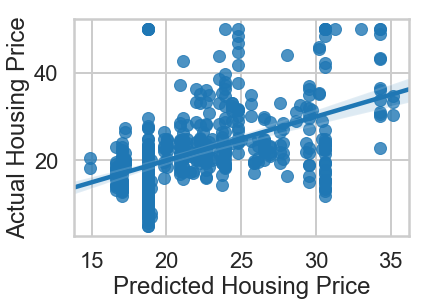

In [65]:
# Plotting the predicted price vs actual price
sns.regplot(y='PRICE', x=lm.predict(X), data=bos)
plt.xlabel('Predicted Housing Price')
plt.ylabel('Actual Housing Price')
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.PRICE, lm.predict(X))[0,1])

An R2 value of 0.26 means that the linear regression model explains 26% of the variance in the response variable, housing price.  It can be seen from the above scatter plot that the model doesn't to too good of a job. 

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>


In [66]:
from scipy.stats import f

R2 = r2_ext
N = len(X)
K = 1
f_stat = (R2 / (1-R2)) * ((N - K - 1) / K)
p_value = f.sf(f_stat, len(X) - 1, len(bos.PRICE) - 1)
print('F Statistic: %.2f' % f_stat)
print('P Value: %f' % p_value)

F Statistic: 175.11
P Value: 0.000000


In [67]:
# Checking with statsmodels summary
m = ols('PRICE ~ PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.61e-34
Time:                        22:24:47   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

The F-statistic was found to be 175.11 with an associated p-value close to 0. The null hypothesis for the F-test is that none of the featueres in the model have an effect on the housing price.  As the p-value is close to 0, I would reject the null hypothesis.  Therefore, the model I produced is statistically significant and it is possible that PTRATIO could be a predictor for housing price.    

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>

When you square the t-statistic (-13.233), it is about the same as the F-statistic (175.1). 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>
</div>

In [68]:
# Fitting/predicting with linear regression model 
X = bos[['CRIM', 'RM', 'PTRATIO']]
lm = LinearRegression()
lm.fit(X, bos.PRICE)
pred = lm.predict(X)

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

In [69]:
# Computing the F-statistic and p-value
R2 = lm.score(X, bos.PRICE)
N = len(X)
K = 3
f_stat = (R2 / (1-R2)) * ((N - K - 1) / K)
p_value = f.sf(f_stat, len(X) - 1, len(bos.PRICE) - 1)
print('F Statistic: %.2f' % f_stat)
print('P Value: %f' % p_value)

F Statistic: 244.22
P Value: 0.000000


In [70]:
# Checking with statsmodels summary
m = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.09e-97
Time:                        22:24:56   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

The F-statistic was found to be 244.22 with an associated p-value close to 0. The null hypothesis for the F-test is that none of the featueres in the model have an effect on the housing price.  As the p-value is close to 0, I would reject the null hypothesis.  Therefore, the model I produced is statistically significant and it is possible that one or some of the features could be predictors for housing price.  

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>


In [71]:
# Extracting the R2 value
r2_ext = lm.score(X, bos.PRICE)
print('Extracted R2 Value: %.2f' % r2_ext)

# Calculating the R2 value
RSS = np.sum((bos.PRICE - pred) ** 2)
ESS = np.sum((pred - np.mean(bos.PRICE)) ** 2)
TSS = RSS + ESS
r2_calc = ESS / TSS
print('Calculated R2 Value: %.2f' % r2_calc)

Extracted R2 Value: 0.59
Calculated R2 Value: 0.59


Correlation Coefficient: 0.77


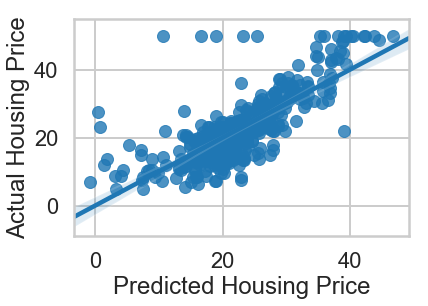

In [72]:
# Plotting the predicted price vs the actual price
sns.regplot(y='PRICE', x=pred, data=bos)
plt.xlabel('Predicted Housing Price')
plt.ylabel('Actual Housing Price')
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.PRICE, pred)[0,1])

An R2 value of 0.59 means that the linear regression model explains 59% of the variance in the response variable, housing price.  So using CRIM, RM, and PTRATIO appears to be an improvement over just using PTRATIO. However, the R2 value does not say that for sure since it artificially increases as we add more features.  Looking at the above scatterplot, it does indeed look like this model does perform better than the previous model with just PTRATIO.

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>

In [73]:
# Extracting the coefficients
coef = pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]
coef

,features,estimatedCoefficients
0,CRIM,-0.202110
1,RM,7.381567
2,PTRATIO,-1.074187


Looking at the above coefficients, the average number of rooms (RM) has the most influence as a unit increase in RM would on average produce a 7.38 unit increase in housing price.  The per capita crime rate (CRIM) has the least influence as a unit increase in CRIM would on average produce an 0.2 unit decrease in housing price. 

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [74]:
# Fitting/predicting with linear regression model 
X = bos[['CRIM', 'RM', 'PTRATIO', 'LSTAT']]
lm2 = LinearRegression()
lm2.fit(X, bos.PRICE)
pred2 = lm2.predict(X)

In [75]:
# Calculating the F-statistic for this model
RSS2 = np.sum((bos.PRICE - pred2) ** 2)
ESS2 = np.sum((pred2 - np.mean(bos.PRICE)) ** 2)
TSS2 = RSS2 + ESS2
R2 = ESS2 / TSS2

N = len(X)
K = 4
f_stat = (R2 / (1-R2)) * ((N - K - 1) / K)
p_value = f.sf(f_stat, len(X) - 1, len(bos.PRICE) - 1)
print('F Statistic: %.2f' % f_stat)
print('P Value: %f' % p_value)

# Calculating the compared F-statistic
DF_red = N - 3 - 1
DF_full = N - 4 - 1

f_comp = ((RSS - RSS2) / (DF_red - DF_full)) / (RSS2 / DF_full)
p_comp = f.sf(f_comp, len(X) - 1, len(bos.PRICE) - 1)

print('F Statistic Comparison: %.2f' % f_comp)
print('P Value Comparison: %f' % p_comp)

F Statistic: 267.85
P Value: 0.000000
F Statistic Comparison: 138.31
P Value Comparison: 0.000000


Correlation Coefficient: 0.83


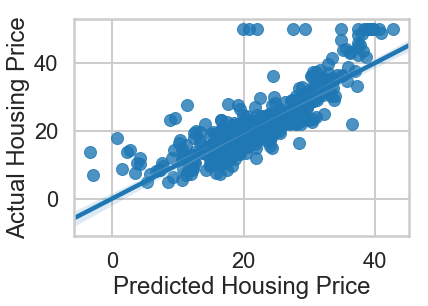

In [76]:
# Plotting the predicted price vs the actual price
sns.regplot(y='PRICE', x=pred2, data=bos)
plt.xlabel('Predicted Housing Price')
plt.ylabel('Actual Housing Price')
print('Correlation Coefficient: %.2f' % np.corrcoef(bos.PRICE, pred2)[0,1])

In [77]:
# Generating statsmodels summary
m2 = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT',bos).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     267.8
Date:                Sun, 02 Dec 2018   Prob (F-statistic):          6.39e-123
Time:                        22:25:17   Log-Likelihood:                -1550.9
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9939      3.973      4.277      0.0

The feature LSTAT was included in this model. The F-statistic for this model was found to be 267.8 with an associated p-value close to 0. The null hypothesis for the F-test is that none of the features in the model have an effect on the housing price.  As the p-value is close to 0, I would reject the null hypothesis.  Therefore, the model I produced is statistically significant and it is possible that one or some features could be a predictor for housing price.

The F-statistic comparing the two models was found to be 138.31 with an associated p-value close to 0.  The null hypothesis for the F-test is that there is no difference between the models.  As the p-value is close to 0, I would reject the null hypothesis. Therefore there is a difference in the models.  

The AIC in the previous model was 3233 and in this model it is 3112, so it has reduced.  The R2 value has also increased to 0.681.  These are indicators that the models is performing better with the added feature of LSTAT.  The scatterplot of predicted prices vs actual prices corroborates this.  


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
   
</div>

In [78]:
# Fitting with linear statsmodel 
m = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()

<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

Correlation Coefficient: 0.00
Standard Deviation of Residuals: 5.86
Mean of Residuals: -0.00


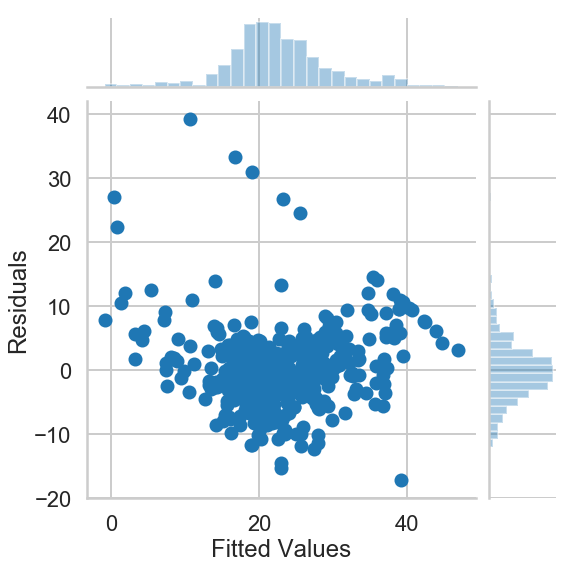

In [79]:
# Creating fitted values vs residuals plot
ax = sns.jointplot(x=m.fittedvalues, y=m.resid, height=8)
ax.ax_joint.set_xlabel('Fitted Values')
ax.ax_joint.set_ylabel('Residuals')
print('Correlation Coefficient: %.2f' % np.corrcoef(m.fittedvalues, m.resid)[0,1])
print('Standard Deviation of Residuals: %.2f' % np.std(m.resid))
print('Mean of Residuals: %.2f' % np.mean(m.resid))

According to the above plot, the distribution of the fitted values are skewed slightly to the right while the distribution of the residuals appears to be normal.  As corroborated by the correlation coefficient of 0, there is no pattern between the two plotted variables. 

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>


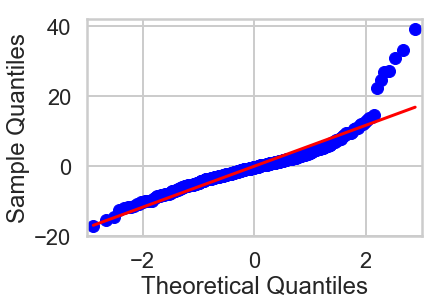

In [80]:
# Creating quantile plot of the residuals
from statsmodels.graphics.gofplots import qqplot
_ = qqplot(m.resid, line='s')

The quantile to quantile plot shows a strong correlation between the theoretical and sample quantiles.  There is a departure in the sample quantiles when the theoretical quantiles are greater than 2, but this plot generally suggests that most of the residuals are normally distributed. 

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

For the fitted vs. residual plot, without knowing the correlation coefficient or seeing the histogram of the residuals, it may sometimes be difficult to ensure that there is no pattern between the fitted values and residuals.  You can see outliers in this plot and for what housing prices the model behaves poorly. 

It is very clear from the quantile plot how much of the residuals are distributed normally.  It is easy to identify outliers and in which theoretical quantiles the model doesn't do well with, but it is not apparent what house prices they relate to. 


<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

There are 2 outliers for when the fitted value is near 0.  There are 5 outliers for when the fitted value is between 15 and 25.  Looking back at the scatter plots between each feature and the housing price, outliers occur mainly for higher (>40) housing prices.  Perhaps this is the reason for the outliers in the residuals.  

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

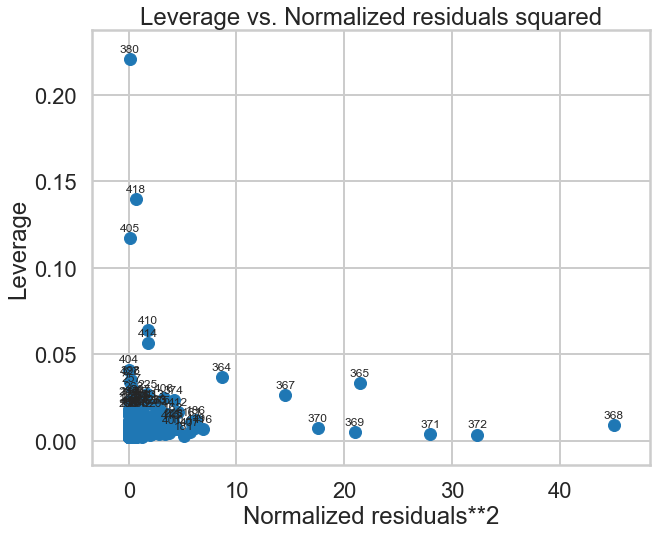

In [81]:
# Creating leverage plot
from statsmodels.graphics.regressionplots import *
fig, ax = plt.subplots(1, 1, figsize = (10,8))
_ = plot_leverage_resid2(m, ax=ax)

From the above graph, it appears that the noted outliers (predicted values with high residuals) have generally low leverage (<0.05).  There are 5 points that have a leverage greater than 0.1 but residuals that are near 0.  These could be due to extreme values in the features pulling the regression line towards them as there are not many values near them.  This would allow their residuals to be very small. 

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>

In [82]:
# Removing outliers and high leverage points
outliers = [380, 418, 405, 410, 414, 364, 367, 370, 369, 365, 371, 372, 368]
bos_cleaned = bos.drop(outliers)

In [83]:
# Fitting/predicting orginal data with linear regression model 
X = bos[['CRIM', 'RM', 'PTRATIO']]
lm = LinearRegression()
lm.fit(X, bos.PRICE)
pred = lm.predict(X)

# Extracting the R2 value
r2 = lm.score(X, bos.PRICE)
print('R2 Value (Original Data): %.2f' % r2)

# Fitting/predicting cleaned data with linear regression model 
X = bos_cleaned[['CRIM', 'RM', 'PTRATIO']]
lm = LinearRegression()
lm.fit(X, bos_cleaned.PRICE)
pred2 = lm.predict(X)

# Extracting the R2 value
r2 = lm.score(X, bos_cleaned.PRICE)
print('R2 Value (Cleaned Data): %.2f' % r2)

R2 Value (Original Data): 0.59
R2 Value (Cleaned Data): 0.73


Correlation Coefficient (Original Data): 0.77
Correlation Coefficient (Cleaned Data): 0.85


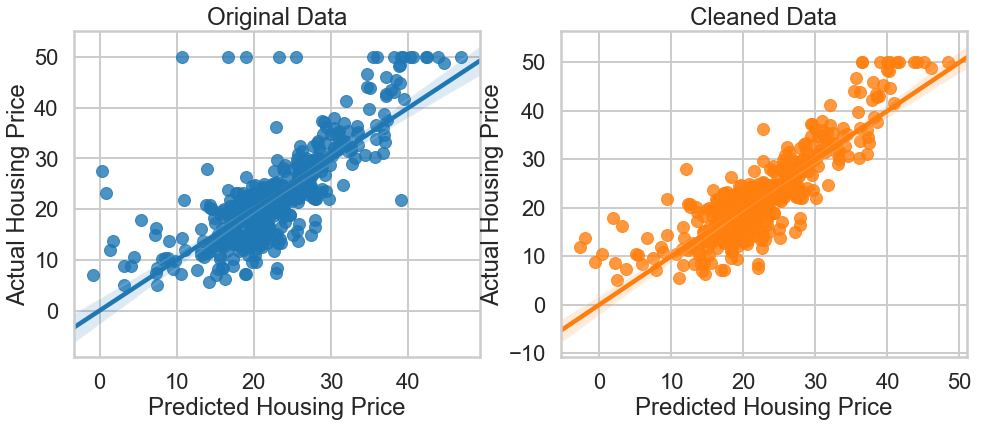

In [84]:
# Plotting the predicted price vs the actual price

fig, ax = plt.subplots(1, 2, figsize = (16,6))

sns.regplot(y='PRICE', x=pred, data=bos, ax=ax[0])
ax[0].set_title('Original Data')
ax[0].set_xlabel('Predicted Housing Price')
ax[0].set_ylabel('Actual Housing Price')

sns.regplot(y='PRICE', x=pred2, data=bos_cleaned, ax=ax[1])
ax[1].set_title('Cleaned Data')
ax[1].set_xlabel('Predicted Housing Price')
ax[1].set_ylabel('Actual Housing Price')

print('Correlation Coefficient (Original Data): %.2f' % np.corrcoef(bos.PRICE, pred)[0,1])
print('Correlation Coefficient (Cleaned Data): %.2f' % np.corrcoef(bos_cleaned.PRICE, pred2)[0,1])

In [85]:
# Getting statsmodel summaries
m = ols('PRICE ~  CRIM + RM + PTRATIO', bos).fit()
print('Summary for original data: \n\n', m.summary())

m2 = ols('PRICE ~  CRIM + RM + PTRATIO', bos_cleaned).fit()
print('\nSummary for cleaned data: \n\n', m2.summary())

Summary for original data: 

                             OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.09e-97
Time:                        22:25:46   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066 

The correlation coefficient improved from 0.77 to 0.85 after removing the outliers and high leverage points. Looking at the scatter plots, it looks like the regression line fits the cleaned data better.  The R2 value improved from 0.59 to 0.73 and the AIC decreased from 3233 to 2902.  One issue, is that the intercept for the cleaned data is less than the original intercept and negative.  In order to really see which model works better, data not used in the fitting process should be tested in each model. 
